# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET



In [ ]:
# import libraries
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from prophet import Prophet
print("All modules imported correctly")

All modules imported correctly


In [ ]:
# dataframes creation for both training and testing datasets
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
# Let's view the head of the training dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# Let's view the last elements in the training dataset
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [ ]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

##EXPLORE DATASET  

In [ ]:
df=df.sort_values('Date')

In [ ]:
df.head(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2807,51,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
1195,51,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


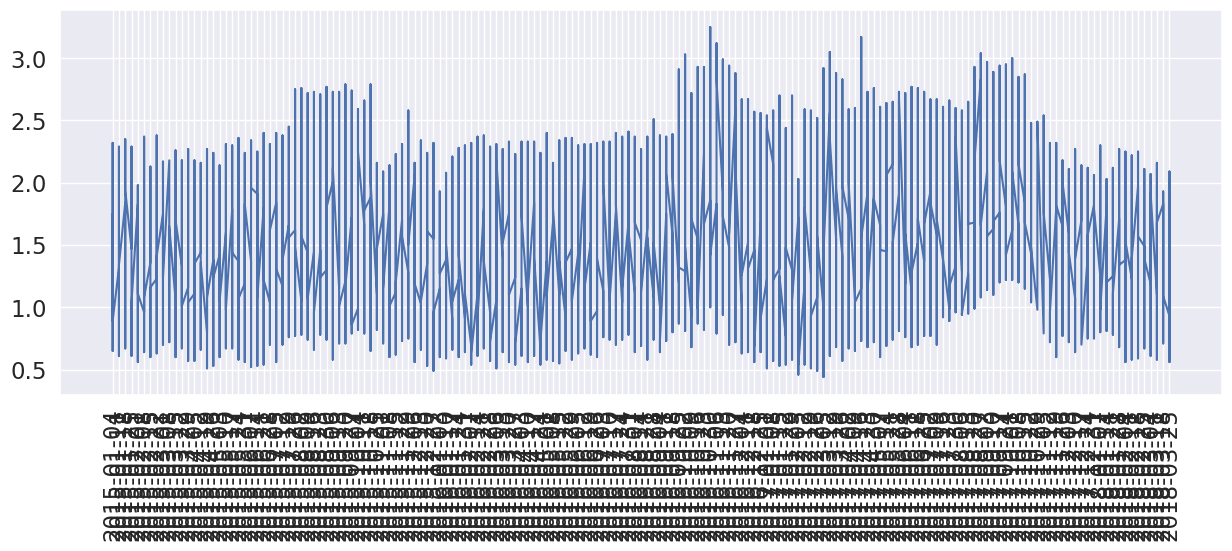

In [ ]:
# Plot date and average price
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.plot(df['Date'],df['AveragePrice'])

<ipython-input-34-3a0b912335f1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AveragePrice'],color='g')


<Axes: xlabel='AveragePrice', ylabel='Density'>

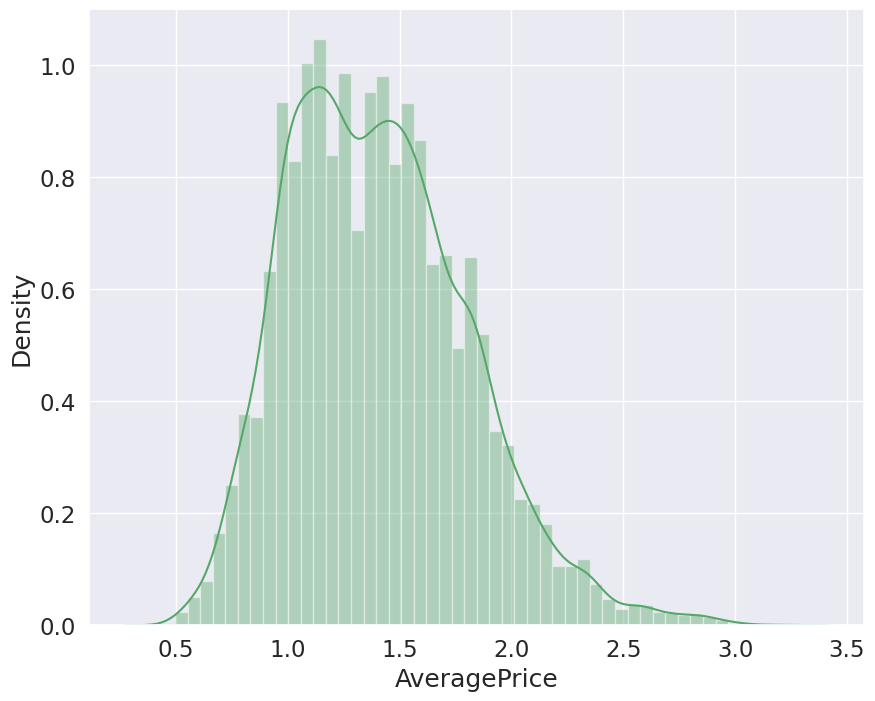

In [ ]:
# Plot distribution of the average price
plt.figure(figsize=(10,8))
sns.distplot(df['AveragePrice'],color='g')

<Axes: xlabel='type', ylabel='AveragePrice'>

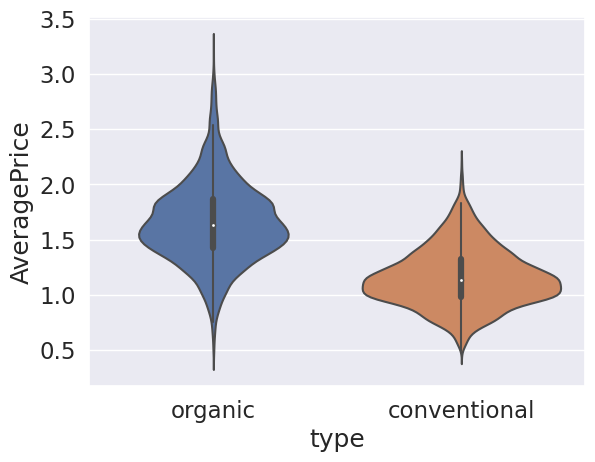

In [ ]:
# Plot a violin plot of the average price vs. avocado type
sns.violinplot(y=df['AveragePrice'],x=df['type'],data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

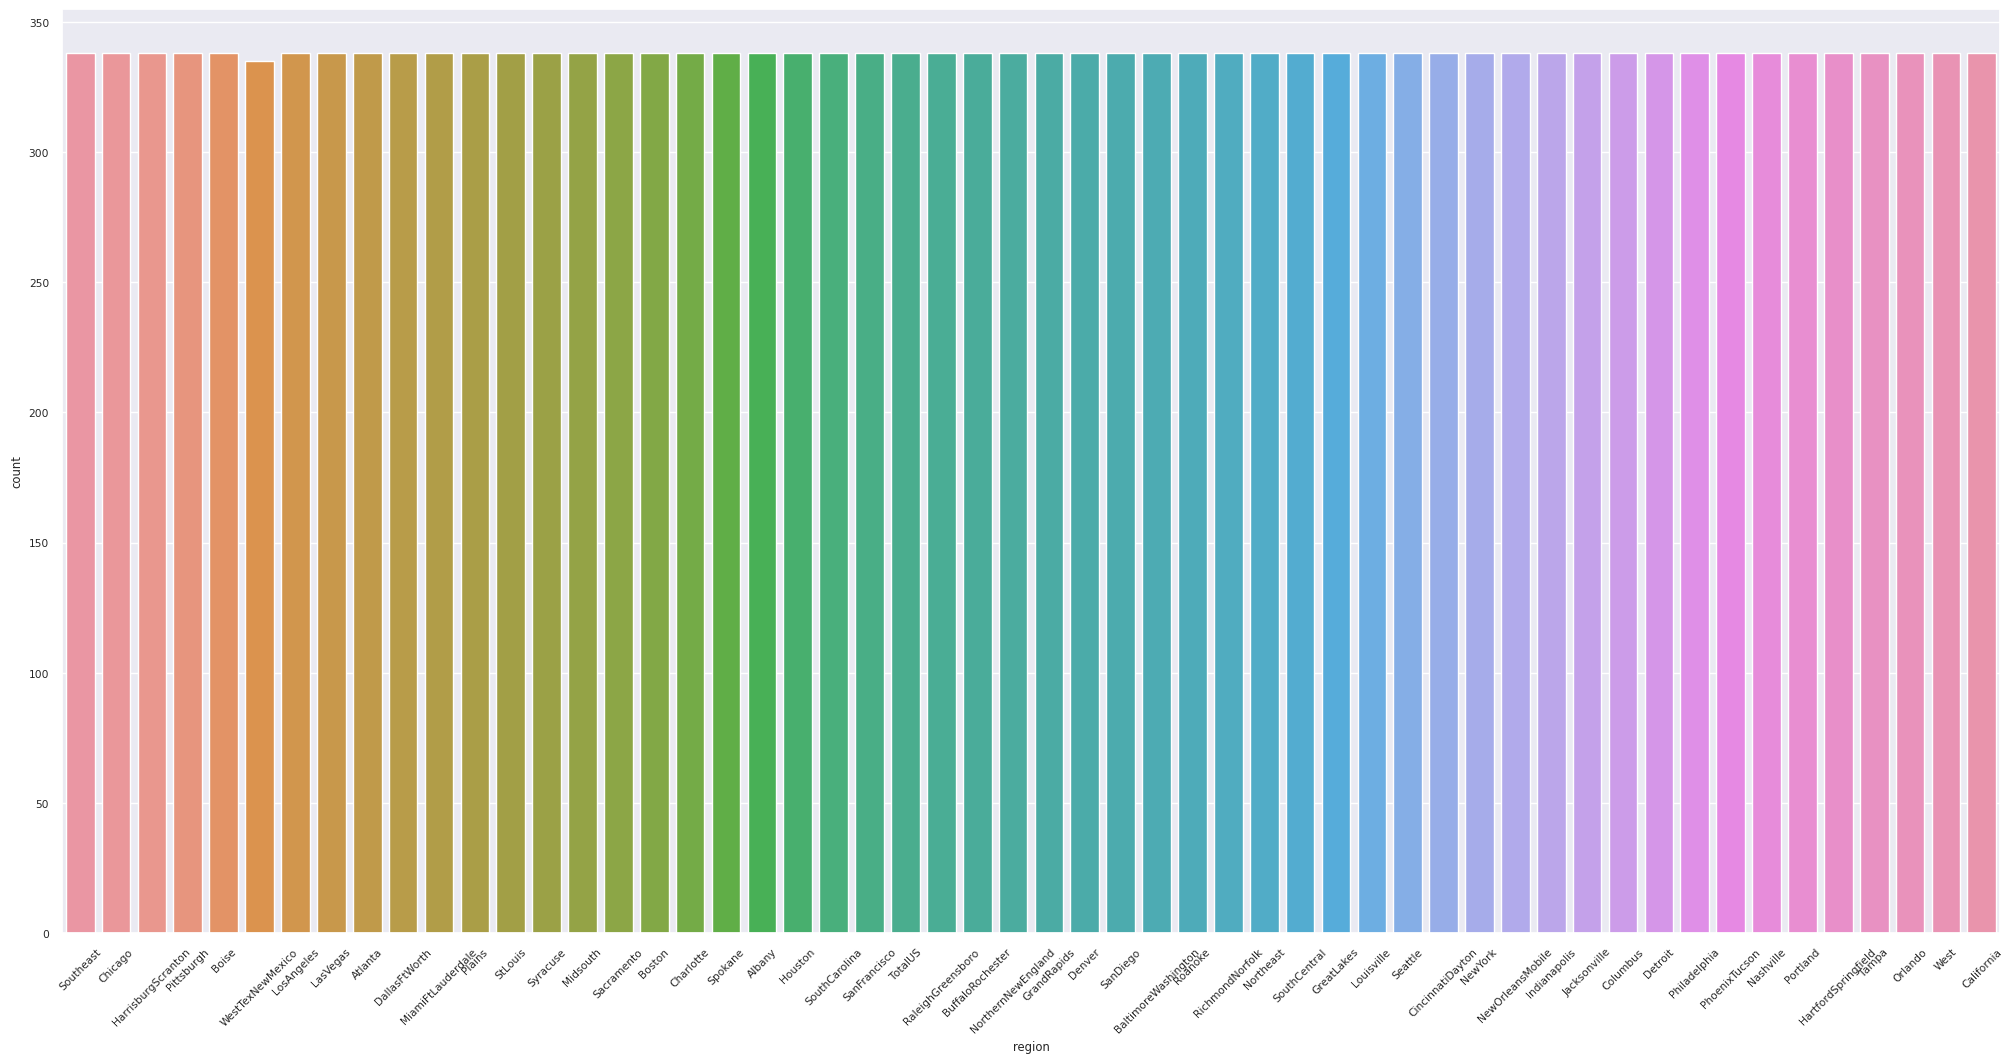

In [ ]:
# Bar Chart to indicate the number of regions

sns.set(font_scale=0.7)
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = df)
plt.xticks(rotation = 45)


(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

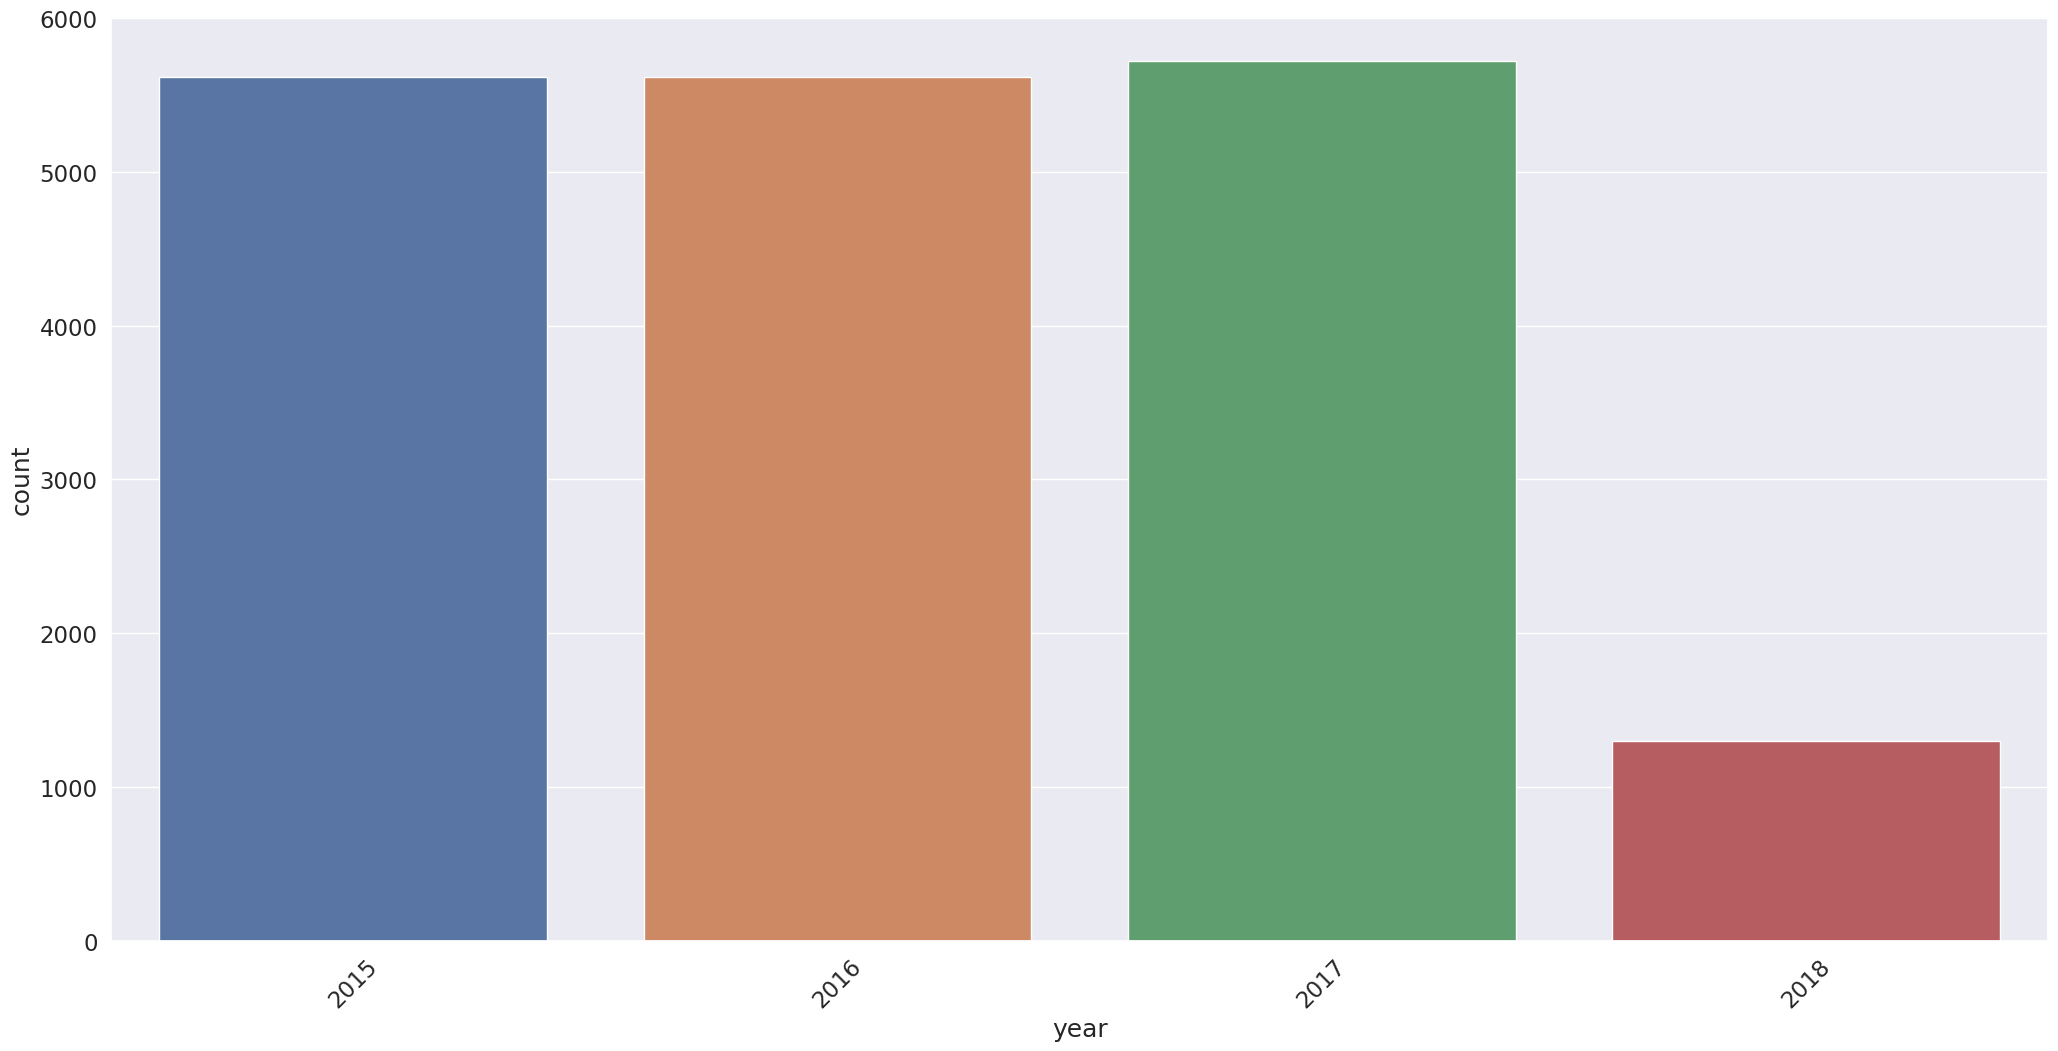

In [ ]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.5)
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 45)

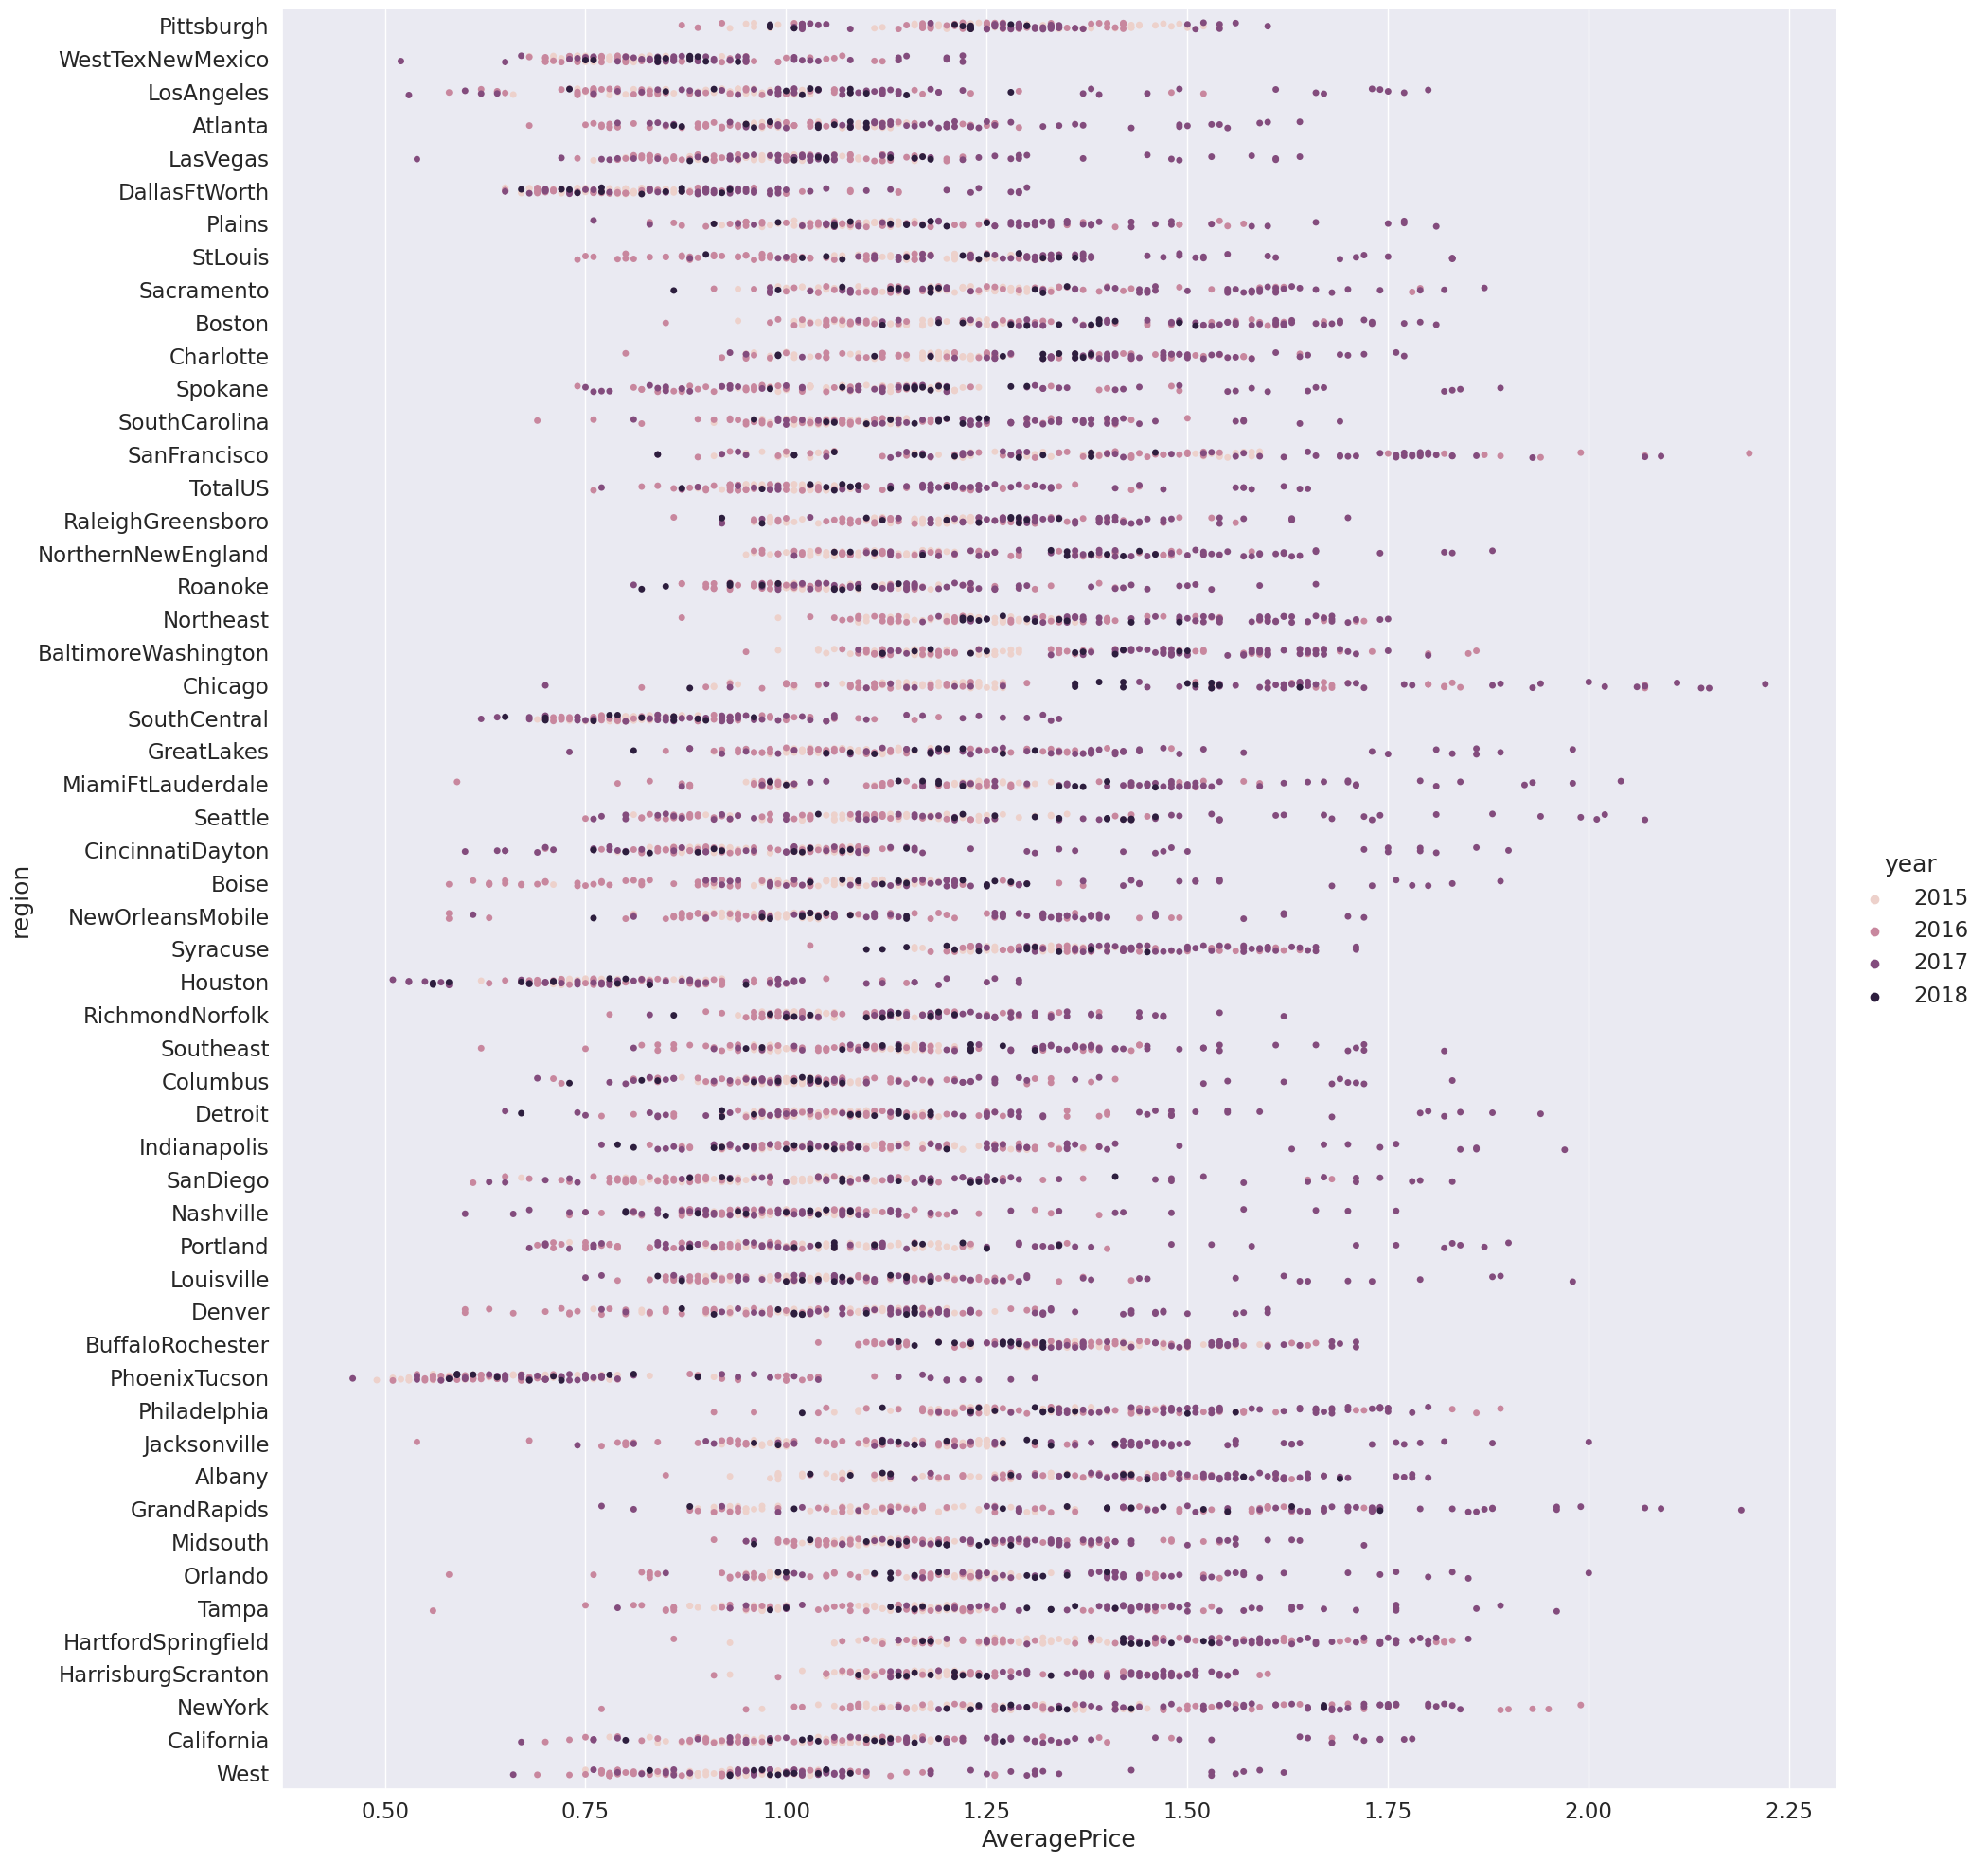

In [ ]:
 # plot the avocado prices vs. regions for conventional avocados
convertion=sns.catplot(x='AveragePrice',y='region',data=df[df['type']=='conventional'],
                          hue='year',height=20)

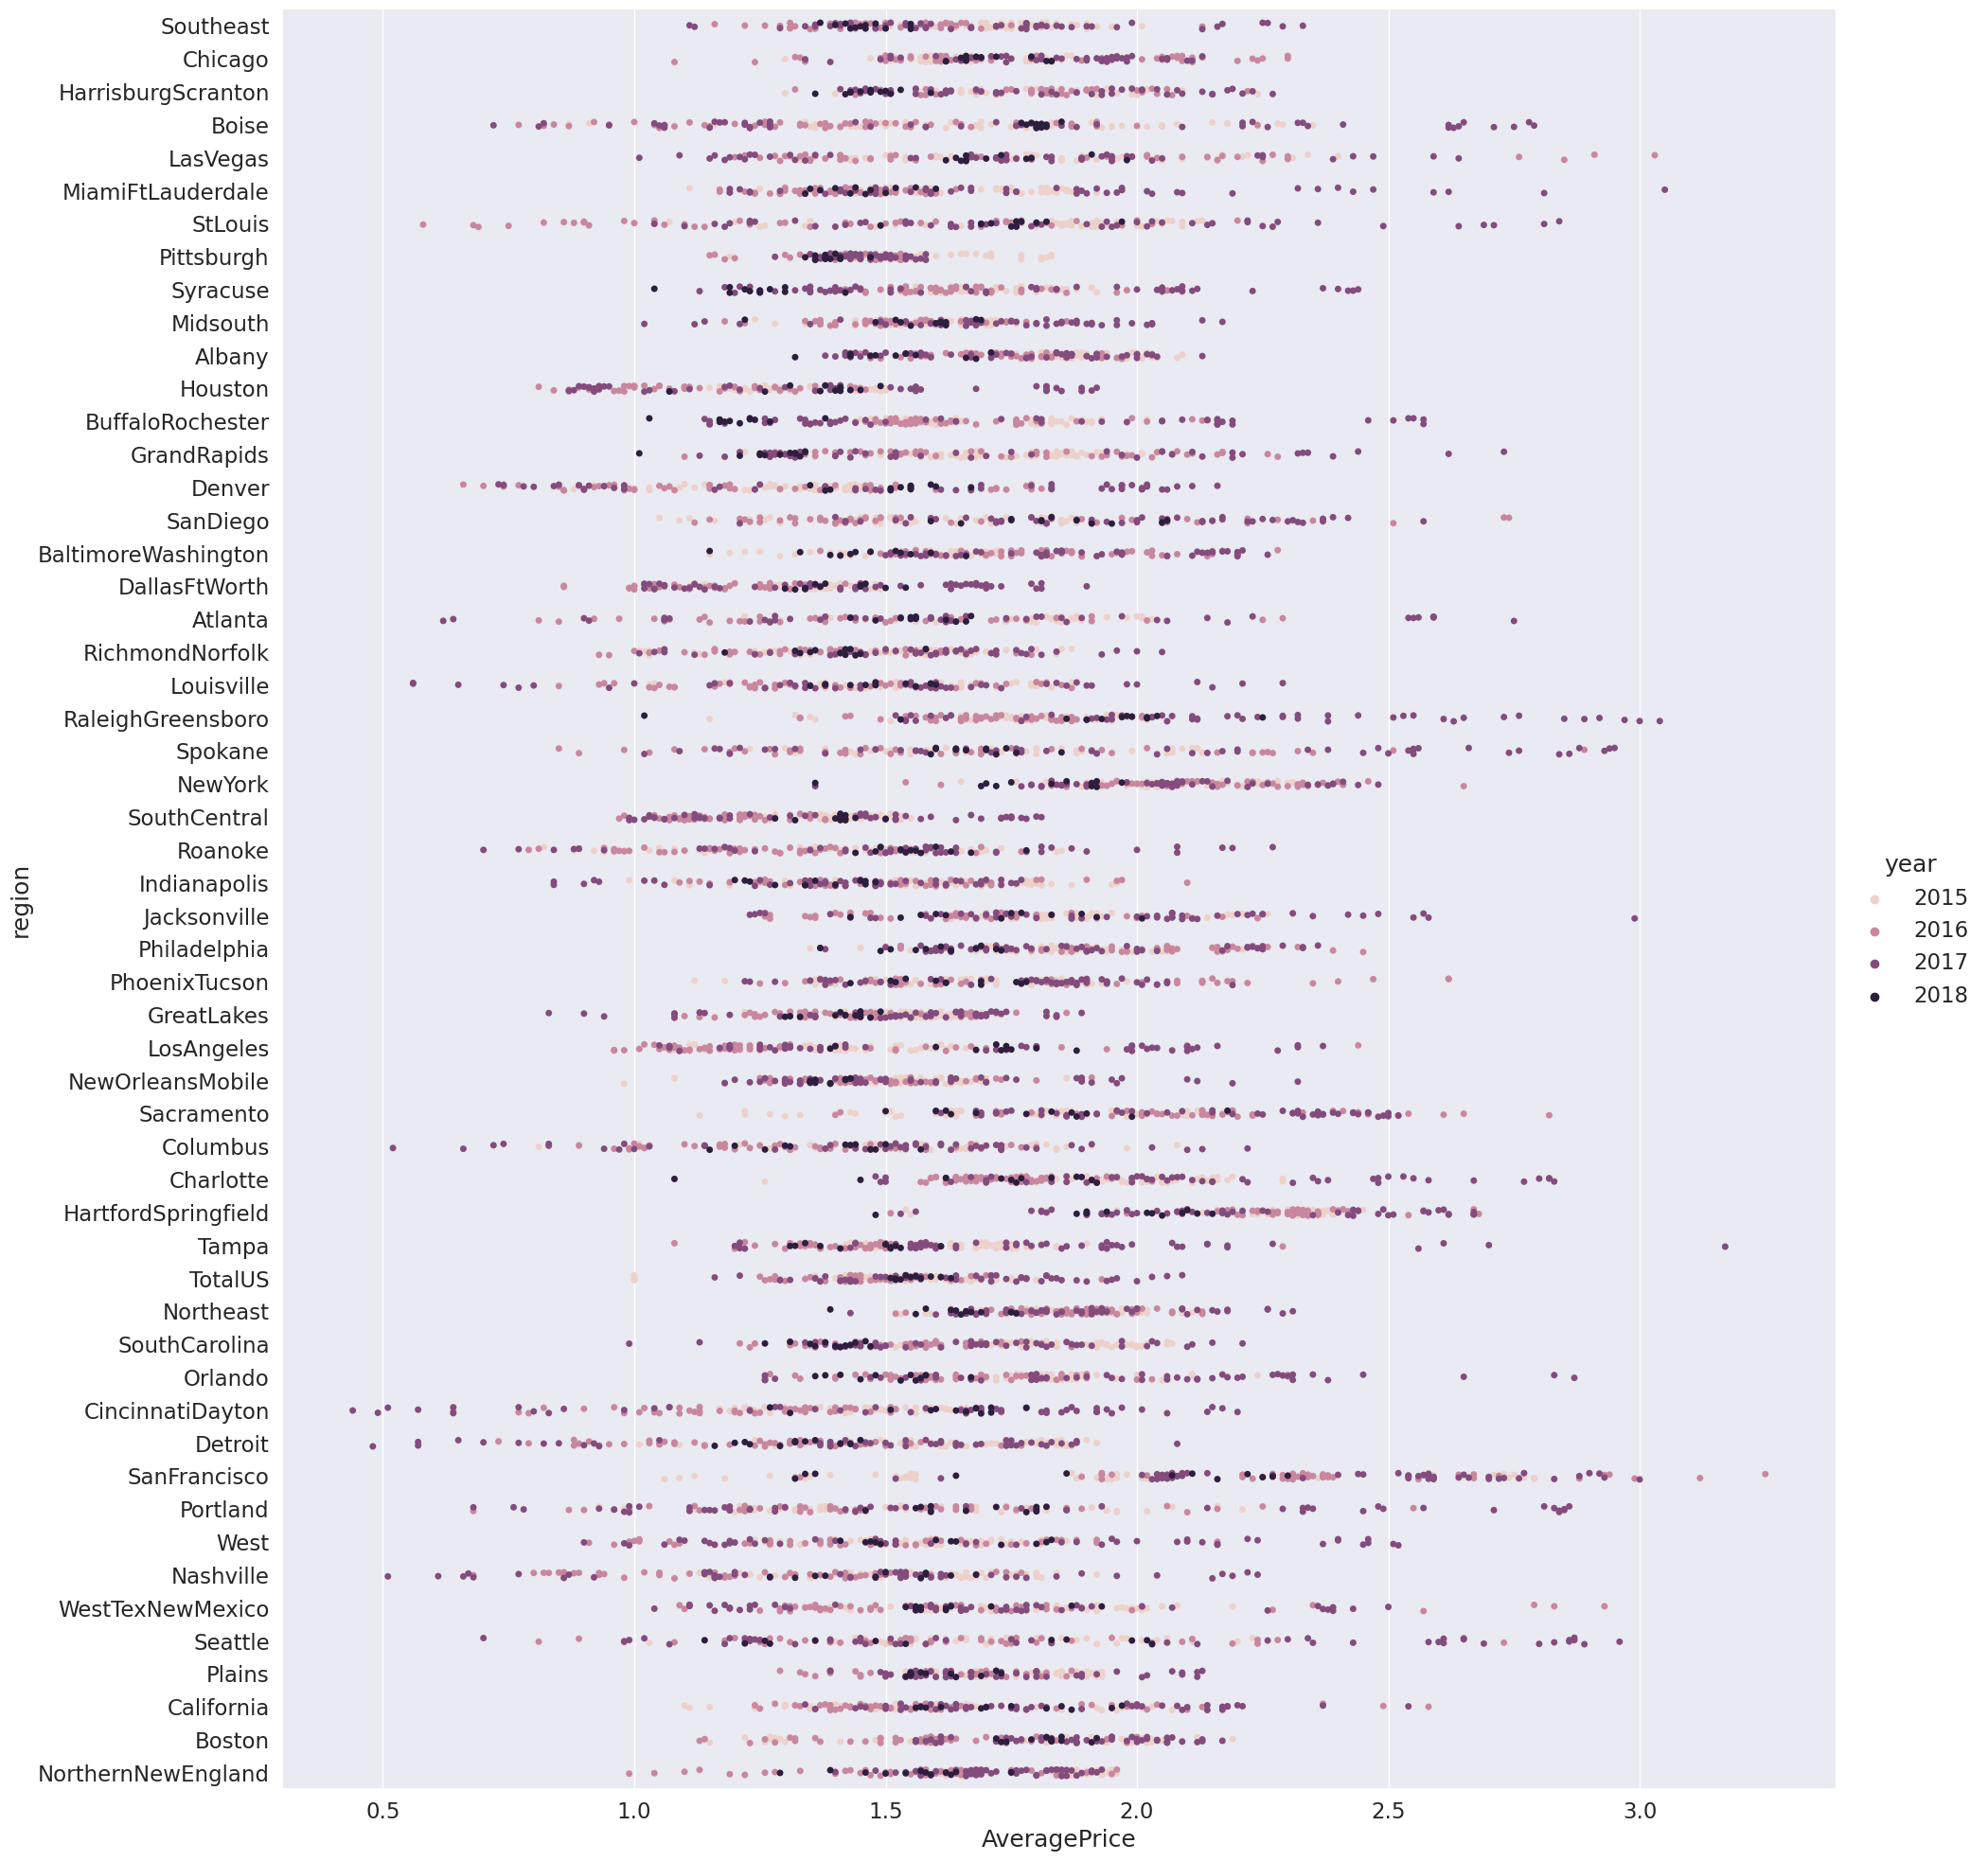

In [ ]:
  # plot the avocado prices vs. regions for organic avocados
organic=sns.catplot(x='AveragePrice',y='region',data=df[df['type']=='organic'],
                          hue='year',height=20)

##PREPARE THE DATA FOR PROPHET TOOL

In [ ]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [ ]:
df_date_price=df[['Date','AveragePrice']]

In [ ]:
df_date_price

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [ ]:
df_date_price=df_date_price.rename(columns={'Date':'ds','AveragePrice':'y'})

In [ ]:
df_date_price

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


##DEVELOP MODEL AND PREDICT

In [ ]:
model=Prophet()
model.fit(df_date_price)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjpt9skpb/_ce_yjj_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjpt9skpb/zzksdpr1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26816', 'data', 'file=/tmp/tmpjpt9skpb/_ce_yjj_.json', 'init=/tmp/tmpjpt9skpb/zzksdpr1.json', 'output', 'file=/tmp/tmpjpt9skpb/prophet_model3bq8dtuc/prophet_model-20230827034524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:45:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:45:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Forcasting into the future
future=model.make_future_dataframe(periods=365)
forecast=model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498334,0.910530,1.857233,1.498334,1.498334,-0.113647,-0.113647,-0.113647,-0.113647,-0.113647,-0.113647,0.0,0.0,0.0,1.384688
1,2015-01-11,1.493164,0.899070,1.854079,1.493164,1.493164,-0.105187,-0.105187,-0.105187,-0.105187,-0.105187,-0.105187,0.0,0.0,0.0,1.387977
2,2015-01-18,1.487993,0.914799,1.865805,1.487993,1.487993,-0.104841,-0.104841,-0.104841,-0.104841,-0.104841,-0.104841,0.0,0.0,0.0,1.383152
3,2015-01-25,1.482823,0.854544,1.854601,1.482823,1.482823,-0.123782,-0.123782,-0.123782,-0.123782,-0.123782,-0.123782,0.0,0.0,0.0,1.359041
4,2015-02-01,1.477652,0.818224,1.804609,1.477652,1.477652,-0.152131,-0.152131,-0.152131,-0.152131,-0.152131,-0.152131,0.0,0.0,0.0,1.325521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.164734,0.597461,1.604737,0.983558,1.333212,-0.086268,-0.086268,-0.086268,-0.086268,-0.086268,-0.086268,0.0,0.0,0.0,1.078466
530,2019-03-22,1.164008,0.537857,1.569760,0.982275,1.333079,-0.084578,-0.084578,-0.084578,-0.084578,-0.084578,-0.084578,0.0,0.0,0.0,1.079431
531,2019-03-23,1.163283,0.535233,1.605425,0.981076,1.333691,-0.082613,-0.082613,-0.082613,-0.082613,-0.082613,-0.082613,0.0,0.0,0.0,1.080670
532,2019-03-24,1.162557,0.571452,1.568186,0.979397,1.334303,-0.080393,-0.080393,-0.080393,-0.080393,-0.080393,-0.080393,0.0,0.0,0.0,1.082163


(array([16467., 16648., 16832., 17014., 17198., 17379., 17563., 17744.,
        17928.]),
 [Text(16467.0, 0, '2015-02'),
  Text(16648.0, 0, '2015-08'),
  Text(16832.0, 0, '2016-02'),
  Text(17014.0, 0, '2016-08'),
  Text(17198.0, 0, '2017-02'),
  Text(17379.0, 0, '2017-08'),
  Text(17563.0, 0, '2018-02'),
  Text(17744.0, 0, '2018-08'),
  Text(17928.0, 0, '2019-02')])

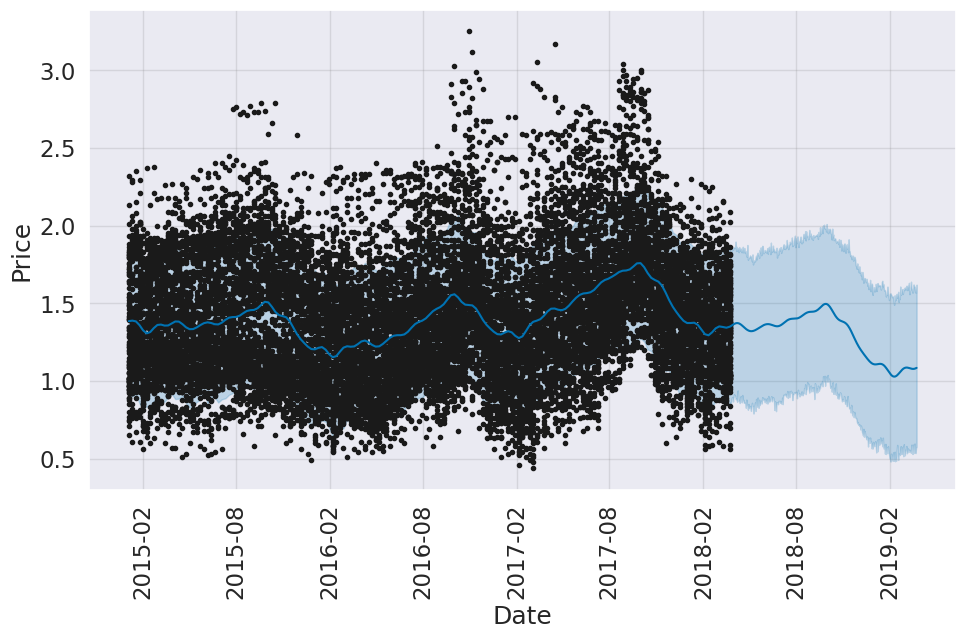

In [ ]:
figure=model.plot(forecast,xlabel='Date', ylabel='Price')
plt.xticks(rotation=90)

(array([17167., 17226., 17287., 17348., 17410., 17471., 17532.]),
 [Text(17167.0, 0, 'January 1'),
  Text(17226.0, 0, 'March 1'),
  Text(17287.0, 0, 'May 1'),
  Text(17348.0, 0, 'July 1'),
  Text(17410.0, 0, 'September 1'),
  Text(17471.0, 0, 'November 1'),
  Text(17532.0, 0, 'January 1')])

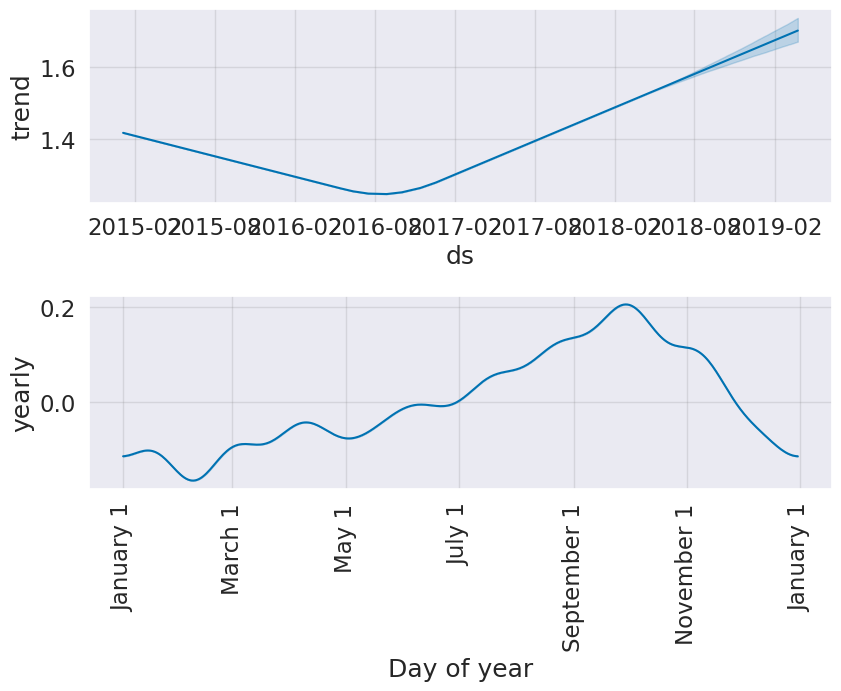

In [ ]:
figure2=model.plot_components(forecast)
plt.xticks(rotation=90)

##DEVELOP MODEL AND PREDICT (REGION SPECIFIC)

In [ ]:
# dataframes creation for both training and testing datasets
avocado_df = pd.read_csv('avocado.csv')


In [ ]:
# Select specific region
df_california=avocado_df[avocado_df['region']=='California']
df_california

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
312,0,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California
313,1,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California
314,2,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California
315,3,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California
316,4,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,7,2018-02-04,1.56,188212.98,38078.53,60551.97,0.00,89582.48,89527.66,54.82,0.00,organic,2018,California
17681,8,2018-01-28,1.87,170998.81,30070.62,58357.89,0.00,82570.30,82563.11,7.19,0.00,organic,2018,California
17682,9,2018-01-21,1.69,181974.98,34411.37,64513.67,0.00,83049.94,83022.84,27.10,0.00,organic,2018,California
17683,10,2018-01-14,1.61,216681.04,52253.40,95353.95,0.00,69073.69,69054.51,19.18,0.00,organic,2018,California


In [ ]:
#df_california=df_california.sort_values('Date')
#df_california

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

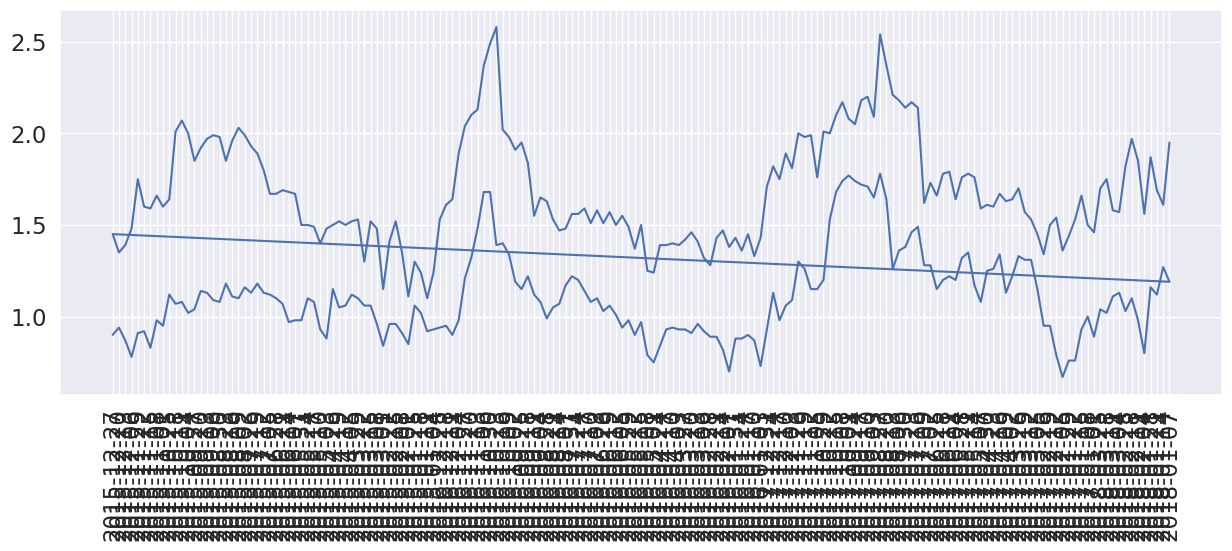

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_california['Date'],df_california['AveragePrice'])
plt.xticks(rotation=90)

In [ ]:
df_california=df_california.rename(columns={'Date':'ds','AveragePrice':'y'})

In [ ]:
m = Prophet()
m.fit(df_california)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjpt9skpb/2ofvpsd0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjpt9skpb/b8767l5o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47641', 'data', 'file=/tmp/tmpjpt9skpb/2ofvpsd0.json', 'init=/tmp/tmpjpt9skpb/b8767l5o.json', 'output', 'file=/tmp/tmpjpt9skpb/prophet_model1ekq7xyp/prophet_model-20230827034533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:45:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:45:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


(array([16467., 16648., 16832., 17014., 17198., 17379., 17563., 17744.,
        17928.]),
 [Text(16467.0, 0, '2015-02'),
  Text(16648.0, 0, '2015-08'),
  Text(16832.0, 0, '2016-02'),
  Text(17014.0, 0, '2016-08'),
  Text(17198.0, 0, '2017-02'),
  Text(17379.0, 0, '2017-08'),
  Text(17563.0, 0, '2018-02'),
  Text(17744.0, 0, '2018-08'),
  Text(17928.0, 0, '2019-02')])

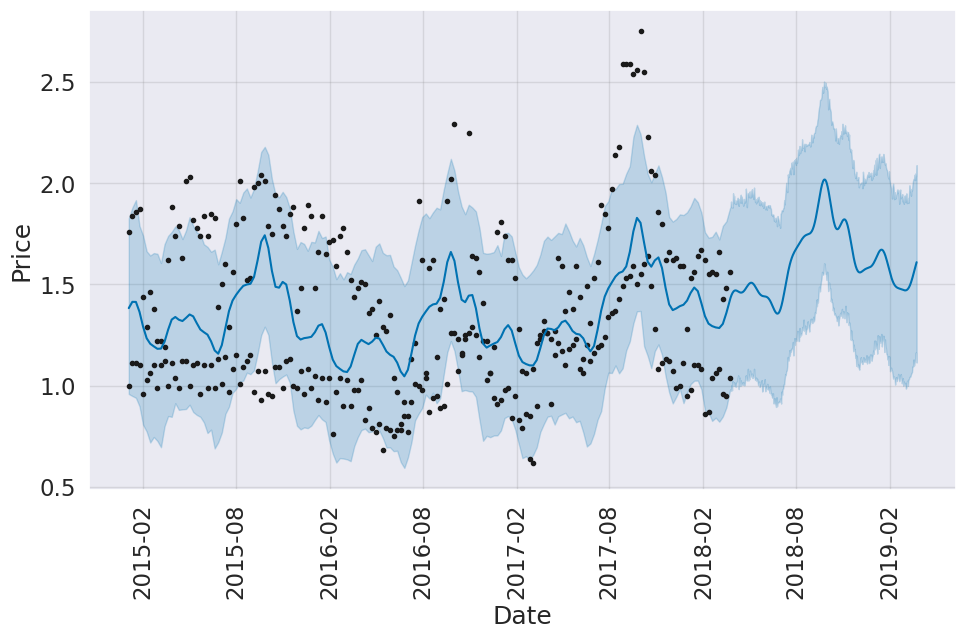

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')
plt.xticks(rotation=90)

(array([17167., 17226., 17287., 17348., 17410., 17471., 17532.]),
 [Text(17167.0, 0, 'January 1'),
  Text(17226.0, 0, 'March 1'),
  Text(17287.0, 0, 'May 1'),
  Text(17348.0, 0, 'July 1'),
  Text(17410.0, 0, 'September 1'),
  Text(17471.0, 0, 'November 1'),
  Text(17532.0, 0, 'January 1')])

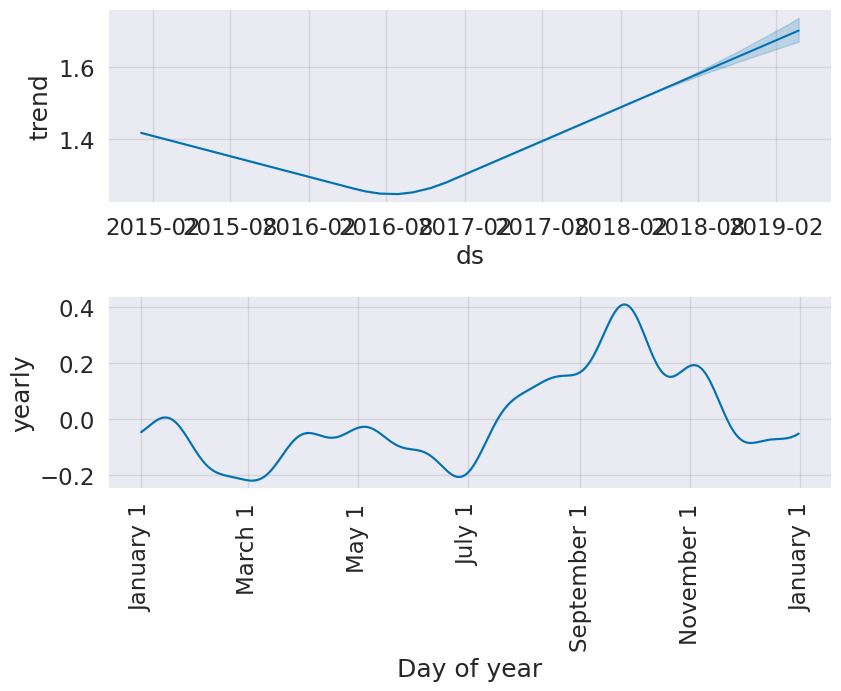

In [ ]:
figure3 = m.plot_components(forecast)
plt.xticks(rotation=90)

In [ ]:
df_atlanta=avocado_df[avocado_df['region']=='Atlanta']

In [ ]:
df_atlanta=df_atlanta.sort_values('Date')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

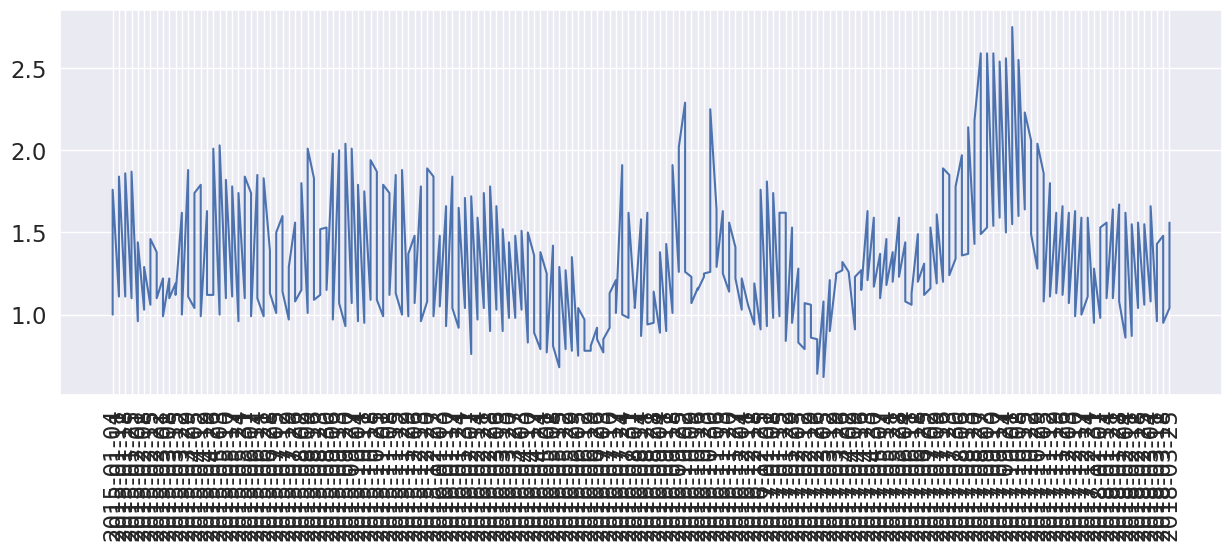

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_atlanta['Date'],df_atlanta['AveragePrice'])
plt.xticks(rotation=90)

In [ ]:
df_atlanta=df_atlanta.rename(columns={'Date':'ds','AveragePrice':'y'})

In [ ]:
m = Prophet()
m.fit(df_atlanta)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjpt9skpb/873fd_dz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjpt9skpb/4k97twyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47283', 'data', 'file=/tmp/tmpjpt9skpb/873fd_dz.json', 'init=/tmp/tmpjpt9skpb/4k97twyi.json', 'output', 'file=/tmp/tmpjpt9skpb/prophet_modelitlhz783/prophet_model-20230827035654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:56:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:56:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


(array([16467., 16648., 16832., 17014., 17198., 17379., 17563., 17744.,
        17928.]),
 [Text(16467.0, 0, '2015-02'),
  Text(16648.0, 0, '2015-08'),
  Text(16832.0, 0, '2016-02'),
  Text(17014.0, 0, '2016-08'),
  Text(17198.0, 0, '2017-02'),
  Text(17379.0, 0, '2017-08'),
  Text(17563.0, 0, '2018-02'),
  Text(17744.0, 0, '2018-08'),
  Text(17928.0, 0, '2019-02')])

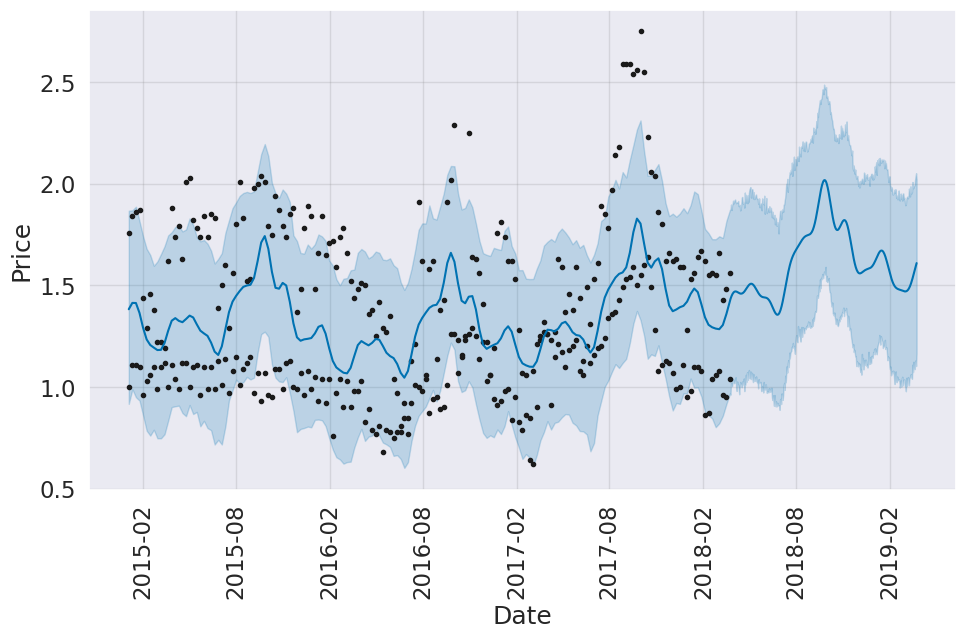

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')
plt.xticks(rotation=90)

(array([17167., 17226., 17287., 17348., 17410., 17471., 17532.]),
 [Text(17167.0, 0, 'January 1'),
  Text(17226.0, 0, 'March 1'),
  Text(17287.0, 0, 'May 1'),
  Text(17348.0, 0, 'July 1'),
  Text(17410.0, 0, 'September 1'),
  Text(17471.0, 0, 'November 1'),
  Text(17532.0, 0, 'January 1')])

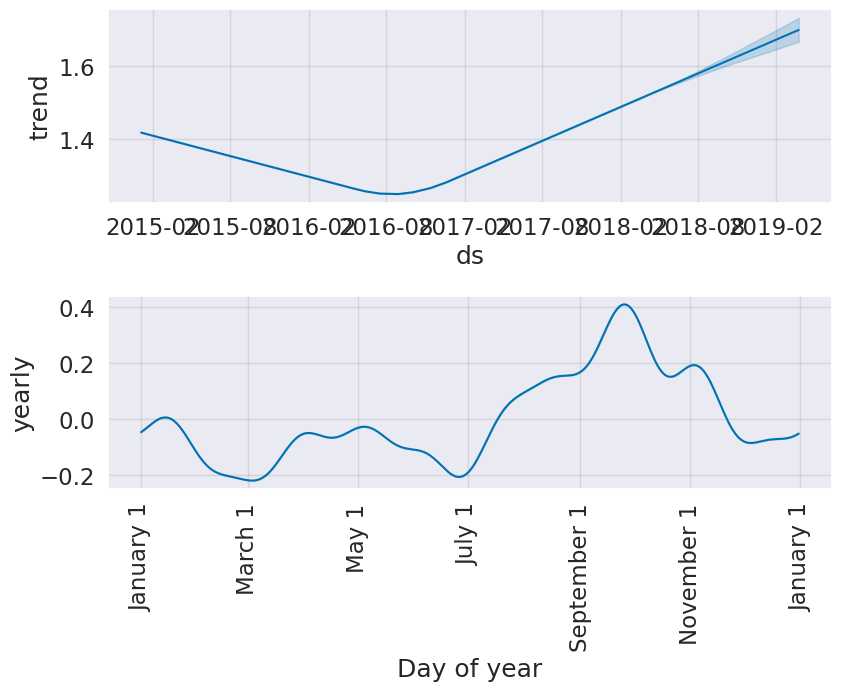

In [ ]:
figure3 = m.plot_components(forecast)
plt.xticks(rotation=90)